# Trex Data Analysis Tutorial
__5. April 2019__

Chiara Amendola, Cristina Martin-Perez, Jonas Rembser

## What you can learn today

We will discuss some common problems in physics data analysis:
* __parameter estimation__, examples:
   * determine your detector resolution
   * obtain calibration coefficients
   
* __hypothesis testing__, examples:
   * is your assumption of a linearity valid?
   * is this process compatible with an exponential law?
   
* __uncertainty calculation__
   * always quote results with uncertainties, e.g. $E = 669 \pm 5$ keV
   * stimate both __statistic__ and __systematic__ uncertainty
   
* __Monte Carlo simulation__, for example:
   * simulate response of photomultiplier tube
   * obtain acceptance of detector with complicated geometry

## Introduction

* Examples in this presentation are based on the programming language __Python__ and libraries from it's ecosystem
* Many alternatives exists, don't hesitate to explore them!
  * __Programming languages__: C++, Julia, R, Matlab, Go, ...
  * __Plotting and data analysis__: gnuplot, ROOT, ..
* This is not an introduction to Python, it assumes you are a bit familiar with it
* There are a lot of resources on the internet:
  * Python website: <https://www.python.org>
  * Python tutorials: <https://docs.python.org/2/tutorial/>
  * Google $\to$ <https://www.stackoverflow.com>

## Software we use in data analysis around Python

The Python ecosystem established itself __the standard__ for modern data analysis, of which you will use today:

* the Python programming language
* the NumPy library for handling numerical data and linear algebra
* the SciPy library for scientific computing
* matplotlib to easily make nice plots
* the Jupyter Notebook to interactively work with Python
  * this presentation is actually a notebook itselt, which you can find here

More specific to High Energy Physics (HEP), there is also ROOT (developed by CERN), a modular scientific software toolkit. It is very useful when performance is key, since it can also be used in C++.

## Reminders about Python

* Syntax is "similar" to English

In [1]:
print("salut tout le monde")

salut tout le monde


* No explicit types for variables

In [2]:
n = 1
s = "one"
print(n, s)

1 one


* Blocks of code (if-else, for loops, ...) are denoted using indentation

In [3]:
number1 = 5.5
number2 = -5.5

if number1 > 0:
    print(number1, "is > 0")
else:
    print(number1, "is <= 0")
    
if number2 > 0:
    print(number2, "is > 0")
else:
    print(number2, "is <= 0")

5.5 is > 0
-5.5 is <= 0


* Lists can contain multiple, ordered, heterogeneous values

In [4]:
mylist = [1, 2, None, 4, "was guckst du"]
for x in mylist:
    print(x)

1
2
None
4
was guckst du


* You can define functions and call them using positional or keyword arguments
* you can also define [classes](https://docs.python.org/3.6/tutorial/classes.html)

In [5]:
def divide(num, den):
    return num/den

x1 = divide(10, 5)
x2 = divide(num=10, den=5)

print(x1, x2)

2.0 2.0


* You can import libraries and use their functionalities:

In [6]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from numpy import matmul as mm

* In the Jupyter notebook, the return value of the last command in the cell is automatically printed

In [7]:
1 + 2 + 3 + 4 + 5 + 6

21

## Pseudorandom numbers

To generate __random data to try out our tools__, we will generate __pseudorandom numbers__.

* number generated by mathematical formulae with statistical properties close to the ones of random numbers.
* a good algorithm should not present a correlation between the generated numbers
* generation of pseudorandom numbers is reporducible: you will get the same numbers if you start from the same seed

_Example_: the __Linear Congruential Generator__ $x_{n+1} = a x_n + c$ mod $m$.

In [8]:
def linear_congruential(size, seed=1, a=7**5, c=0, m=2**31):
    n = np.prod(size)
    x = np.empty(n)
    x[0] = seed
    for i in range(1,n):
        x[i] = (a*x[i-1] + c) % m
    return x.reshape(size) / m

With the wrong choice of $a, c$ and $m$, the __Linear Congruential Generator__ shows an obvious non-random pattern.

In [9]:
x1 = linear_congruential((2,500), seed=1, a=7**5, c=0, m=2**31)
x2 = linear_congruential((2,500), seed=1, a=13, c=0, m=31)

In [10]:
def linear_congruential_plot(x1, x2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    ax1.scatter(x1[0], x1[1], s=2, color='k')
    ax2.scatter(x2[0], x2[1], s=2, color='k')
    ax1.set_xlim(0,1); ax1.set_ylim(0,1); ax2.set_xlim(0,1); ax2.set_ylim(0,1)
    ax1.set_title(r'$a = 7^5$,   $c=0$,   $m=2^{31}$')
    ax2.set_title(r'$a = 13$,   $c=0$,   $m=31$')
    ax1.set_xlabel(r'$x_1^1$')
    ax1.set_ylabel(r'$x_1^2$')
    ax2.set_xlabel(r'$x_2^1$')
    ax2.set_ylabel(r'$x_2^2$')
    plt.show()

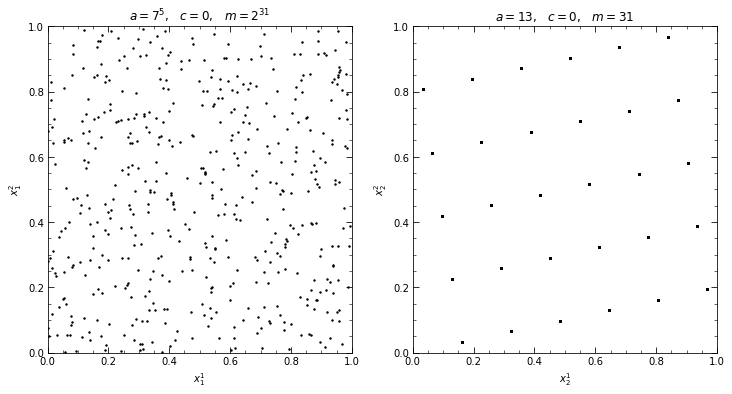

In [11]:
linear_congruential_plot(x1, x2)

## Pseudorandom numbers in Python

Python and numpy use the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) algorithm for pseudorandom number generation. We can set the seed for numpy with `np.random.seed()` to get reproducible results and use the [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html) module to generate arrays of random numbers according to many different probability density functions, for example a __uniform distribution__:

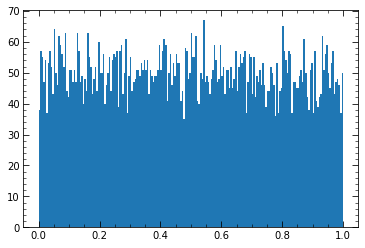

In [12]:
np.random.seed(42)

a = np.random.uniform(size=10000)
plt.hist(a, bins=200)
plt.show()

## Histograms

A __histogram__ is a representation of the distribution of numerical data. The [numpy.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) function returns you the number of counts in each __bin__, with the bins being defined by the __bin edges__ you pass as a second argument.

In [13]:
data = [1, 2, 3, 3, 3, 5, 1, 0, -1, 4]
bins = np.linspace(-6, 6, 21)

np.histogram(data, bins)

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 3, 1, 0, 1, 0]),
 array([-6. , -5.4, -4.8, -4.2, -3.6, -3. , -2.4, -1.8, -1.2, -0.6,  0. ,
         0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]))

The `numpy.histogram` function returns you:
* the number of counts in each bin
* the bin edges (redundant information here since we already specified them)

You can also fill histograms with random values, here for example according to a __normal distribution__:

In [14]:
a = np.random.normal(loc=0.0, scale=2.0, size=1000)
np.histogram(a, bins)

(array([  1,   2,  12,  21,  28,  47,  66,  82, 112, 112, 122, 101,  96,
         77,  43,  31,  20,  14,   7,   1]),
 array([-6. , -5.4, -4.8, -4.2, -3.6, -3. , -2.4, -1.8, -1.2, -0.6,  0. ,
         0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]))

It's also very convenient to plot histograms directly with the [matplotlib.pyplot.hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function, which uses the same interface:

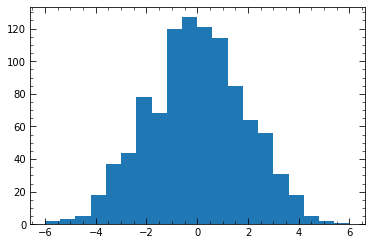

In [15]:
a = np.random.normal(loc=0.0, scale=2.0, size=1000)

plt.hist(a, bins)
plt.show()

However, the  `numpy` function is still very useful in case you want to do something with the counts before plotting, them, for example to calculate the __Poissonian uncertainy__:

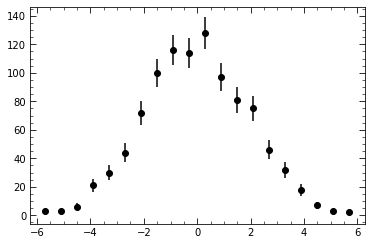

In [16]:
a = np.random.normal(loc=0.0, scale=2.0, size=1000)

counts, _ = np.histogram(a, bins)
uncert = np.sqrt(counts)
bincenters = (bins[1:] + bins[:-1])/2.

plt.errorbar(bincenters, counts, yerr=uncert, fmt='o', color='k')
plt.show()

Having the numpy array with the counts and uncertainties also helps you when you want to __fit your data__ (more on fitting later):

In [17]:
def gaus(x, mu, sigma, N):
    return N * 1./(np.sqrt(2*np.pi)*sigma) * np.exp(-(x - mu)**2/(2*sigma**2))

popt, pcov = curve_fit(gaus, bincenters, counts,
                       sigma=uncert, p0=[1., 1., 1000.])

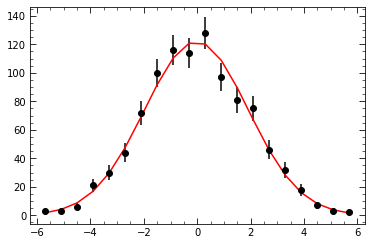

In [18]:
plt.plot(bincenters, gaus(bincenters, *popt), "r")
plt.errorbar(bincenters, counts, yerr=uncert, fmt='o', color='k')
plt.show()

## Fitting the data

Let's create some toy data which is distributed according to $121 /\sqrt{2x}$, plus some Gaussian noise.

In [19]:
def f_true(x):
    return 121./np.sqrt(2.*x)

In [20]:
def f_noise(x):
    return np.random.normal(loc=0.0, scale=5., size=x.shape)

In [21]:
def f_measurement(x):
    return f_true(x) + f_noise(x)

In [22]:
x = np.linspace(1., 10., 20)
y = f_measurement(x)
yerr = np.sqrt(y)

In [23]:
def data_and_true_function_plot(x, y, yerr, f_true):
    xx = np.linspace(1.,10.,200)
    plt.plot(xx, f_true(xx), label="true distribution")
    plt.errorbar(x, y, yerr=yerr, fmt='o', color='k', label="data")
    plt.legend(loc="upper right")
    plt.xlabel("Amplitude")
    plt.ylabel("Counts")

In [24]:
def data_plot(x, y, yerr):
    plt.errorbar(x, y, yerr=yerr, fmt='o', color='k', label="data")
    plt.legend(loc="upper right")
    plt.xlabel("Amplitude")
    plt.ylabel("Counts")

This is a visualization of our "measured" data and the underlying function:

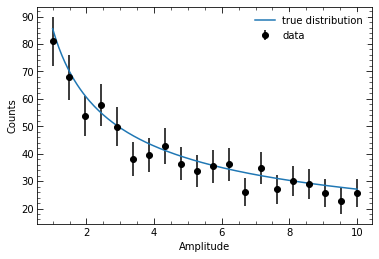

In [25]:
data_and_true_function_plot(x, y, yerr, f_true)
plt.show()

In a real experiment, you find youself rather in the following situation:

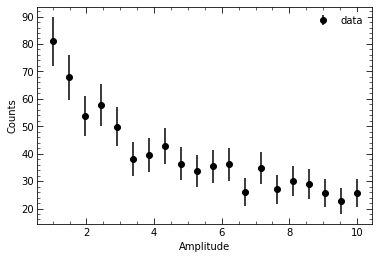

In [26]:
data_plot(x, y, yerr)
plt.show()

You don't know the underlying function! But you want to fit it in order to estimate the parameters $a$ and $b$ in the model $a/\sqrt{bx}$.

How is this done?

### The Likelihood

The fit should give you the model for which the observed data is the most likely:

$$\text{best model} = \text{argmax}_\text{model}~\mathcal{L}(\text{model}),$$
where
$$\mathcal{L}(\text{model}) = P(\text{data}|\text{model}).$$

We often denote a model as an ensemble of model parameters $\theta$, and the parameters of the best model as $\hat\theta$:

$$\hat\theta = \text{argmax}_\theta~\mathcal{L}(\theta)$$

### Fitting with linear least squares

In the case of a __linear model__ $f(x) = \theta_1x + \theta_0$ where the data fluctuates with the measured uncertainties $\sigma_i$ according to a normal distribution:

$$\mathcal{L}(\theta) = \prod_i \frac{1}{\sqrt{2\pi\sigma_i}} \exp\left(\frac{(y_i - \theta_1 x_i + \theta_0)^2}{2\sigma_i^2}\right).$$

We omitted from now on the normalizations of the Gaussians as they have no effect on the position of the minimum $\hat\theta$.

__Note:__ when we talk about a __linear model__, we mean linear in the parameters $\vec\theta$, not the observed $\vec x$ or $\vec y$! For example, a quadratic model $f(x) = \theta_2x*2 + \theta_1x + \theta_0$ is also linear in that sense.

Maximizing $\mathcal{L}$ is equivalent to minimizing $-2\log\mathcal{L}$:

$$-2\log\mathcal{L}(\vec\theta) = -2\log\left(\prod_i \exp\left(\frac{\left(y_i - \theta_1 x_i + \theta_0\right)^2}{2\sigma_i^2}\right)\right) + C = \sum_i \frac{(y_i - \theta_1 x_i + \theta_0)^2}{\sigma_i^2} + C$$

The constant $C$ would be the term from the normalizations, which we can ignore from now. As an exercise, you can find the best fit values $\theta_1$ and $\theta_2$ analytically.

Here, we will recognize the problem as a weighted __linear least squares problem__ and tackle it with linear algebra.

Let us express the problem in matrix notation:

$$ \vec{\hat\theta} = \text{argmin}_\vec\theta~(\vec y - X\vec\theta)^TV^{-1}(\vec y - X\vec\theta).$$

The matrix $V$ is a so called __covariance matrix__, which generalizes the notion of variance to multiple dimensions. I our example, $V$ is diagonal because our individual measurements are not correlated:

$$
V = \begin{pmatrix} 
    \sigma_{1}^2 & 0 & \dots \\
    \vdots & \ddots & \\
    0 &        & \sigma_n ^2
    \end{pmatrix}
$$

In [27]:
V = np.diag(uncert**2)

Furthermore, we "extend" the vector $\vec x$ to a matrix $X$, which has one additional column filled with ones to translate our problem of a linear fit __with offset__ to matrix notation:

$$X = \begin{pmatrix}
      1 & x_1 \\
      \vdots & \vdots \\
      1 & x_n 1
      \end{pmatrix}.
$$

In [28]:
X = np.vstack([np.ones_like(x), x]).T

The vectors $\vec y$ and $\vec \theta$ remain the measured values and the vector of model parameters $\vec\theta = \begin{pmatrix}\theta_0 & \theta_1 \end{pmatrix}$ respectively.

We can now find $\vec{\hat\theta}$ analytically as the solution of:

$$X^TV^{-1}X\vec{\hat\theta} = X^TV^{-1}\vec{y},$$

$$A\vec{\hat\theta} = B\vec{y}.$$

We could bring $A$ on the right side by inverting it, but solving a linear equation directly is numerically more stable than inversion and multiplication.

In [29]:
V_inv = np.linalg.inv(V)
A = mm(X.T, mm(V_inv, X)) # we imported numpy.matmul as mm
B = mm(X.T, V_inv)
popt = np.linalg.solve(A, mm(B, y))

Using error propagation, we can find the __covariance matrix of the model parameters__ as folllows:

$$U = (A^{-1}B)V(A^{-1}B)^T = (X^TV^{-1}X)^{-1}.$$

In [30]:
pcov = np.linalg.inv(mm(X.T, mm(V_inv, X)))

You have now see the __linear least squares fit__ and got your first fit result:

In [31]:
print(popt)
print("")
print(pcov)

[76.27982375 -5.43537681]

[[ 1.49977016 -0.17598077]
 [-0.17598077  0.03021025]]


As expected, the covariance matrix is symmetric and positive semidefinite.

Remember that the diagonal elements of the covariance matrix are the __variances of the parameters__, so we just extract the square root of the diagonal to get the uncertainties on the fit paramteres:

In [32]:
puncert = np.sqrt(np.diag(pcov))
print(f"theta_0 is found to be {popt[0]:.1f} ± {puncert[0]:.1f}.")
print(f"theta_1 is found to be {popt[1]:.2f} ± {puncert[1]:.2f}.")

theta_0 is found to be 76.3 ± 1.2.
theta_1 is found to be -5.44 ± 0.17.


As we could already anticipate, the linear fit is not adequate for this example data, so we still have to discuss two questions:
* How can we test the goodness of a fit?
* How can we perform non-linear fits?

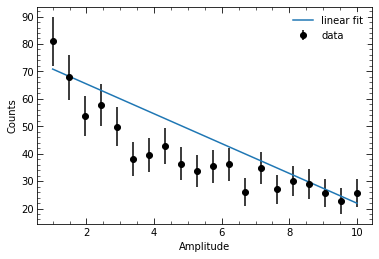

In [34]:
data_plot(x,y, yerr)
plt.plot(x, np.matmul(X, popt), label="linear fit")
plt.legend(loc="upper right")
plt.show()